In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


# A Silent Killer?

Heart disease is the leading cause of death across ethnicities with one person succumbing to it every **36 seconds** in the US. Over half a million Americans die of heart disease each year - almost **1 in every 4** deaths - with costs of health services, care and productivity loss amounting to over **200M$** each year.

More specifically, **1 in every 5** heart attacks is silent - with the damage being done and the person impacted is unaware of it. Early action is critical and knowing the signs and symptoms of a heart attack could help. It would be even more beneficial if we can effectively predict the possibility of a heart attack and take preventive action.

Heart attack (a.k.a *myocardial infraction*) happens when a part of the heart muscle doesn't get enough blood. And the more time passes without restoration of blood flow, the greater the damage to the heart. Coronary artery disease (**CAD**) is the major cause for heart attacks and is caused by plaque build-up in the arterial walls and other parts of the body. Plaque is made up of deposits of cholesterol and other substances. Plaque build up causes the arteries to narrow and over time, this can block (partially or wholly) blood flow.

Risk factors include age, family history and lifestyle choices. While age and family history can't be controlled, appropriate lifestyle choices can help mitigate the incidence of heart attacks.

# About the data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "target" field refers to the presence of heart disease in the patient. 

**Attribute Information**
1. Age
2. Sex - 1 : male, 0: female
3. CP - Chest pain type, 0 : typical angina,1 : atypical angina, 2 : non-anginal pain, 3: asymptomatic
4. trestbps - Resting BP
5. chol - Serum Cholesterol (mg/dl)
6. fbs - Fasting blood glucose (>120 mg/dl), 1: true, 0: false
7. restecg -Resting ECG results, 0: normal,1 : having ST-T, 2: hypertrophy
8. thalach - Maximum heart rate achieved
9. exang - Exercise induced angina, 1: yes, 0: no
10. OldPeak - ST depression induced by exercise relative to rest
11. Slope - slope of the peak exercise ST segment, 0: upsloping, 1: flat, 2: downsloping
12. ca - Number of major vessels colored by fluroscopy
13. Thal - 0 : normal, 1 : fixed defect, 2 : reversible defect
14. Target - 0 : less chance of heart attack, 1 : more chance of attack

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Knowing the data



In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [3]:
dat = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
dat.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
pp.ProfileReport(dat)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing the data

In [5]:
# drop duplicate rows
df = dat.drop_duplicates()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# define target and predictors
# np.random.seed(12345)
# df = df.reindex(np.random.permutation(df.index))
y = df['target']
X = df.drop(['target'],axis=1)

print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.0 KB
None


# Modeling

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Build Functions**

In [9]:
def model_fit_summarize(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    confmat = confusion_matrix(y_test,y)
    acc = accuracy_score(y_test, y)*100
    pre = precision_score(y_test, y)*100
    rec = recall_score(y_test, y)*100
    roc_auc = roc_auc_score(y_test, y)*100

#     print('Confusion Matrix :\n',confmat)
    print('Accuracy score : {:.2f} %'.format(acc))
    print('Precision score : {:.2f} %'.format(pre))
    print('Recall score : {:.2f} %'.format(rec))
    print('ROC_AUC score : {:.2f} %'.format(roc_auc))
    
    print('\nClassification report :\n', classification_report(y_test, y))

    plot_roc_curve(model, X_test, y_test)
    plot_precision_recall_curve(model, X_test, y_test)
    plot_confusion_matrix(model, X_test, y_test)
    
    return acc, pre, rec, roc_auc

**Logistic Regression**

Accuracy score : 86.89 %
Precision score : 86.11 %
Recall score : 91.18 %
ROC_AUC score : 86.33 %

Classification report :
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



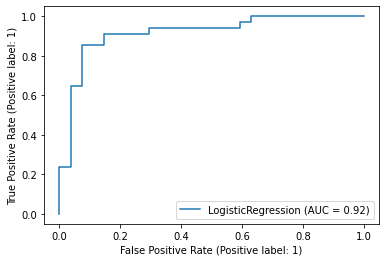

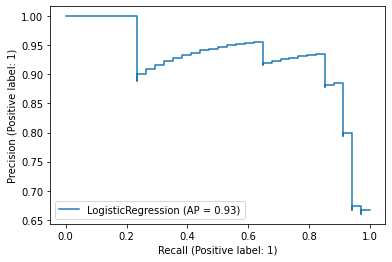

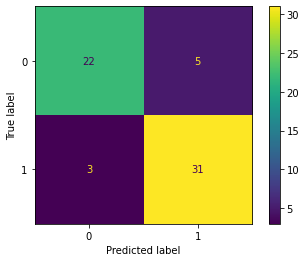

In [10]:
lr = LogisticRegression(solver='liblinear')
a,b,c,d = model_fit_summarize(lr, X_train, y_train, X_test, y_test)
summary = pd.DataFrame([a,b,c,d],index=['Accuracy','Precision','Recall','ROC_AUC'],columns=['LogisticRegression'])

**Decision Tree**

Accuracy score : 78.69 %
Precision score : 83.87 %
Recall score : 76.47 %
ROC_AUC score : 78.98 %

Classification report :
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



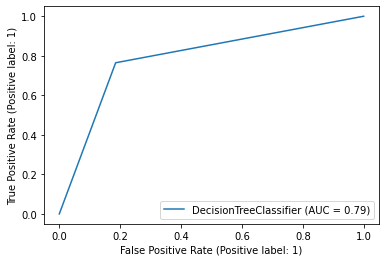

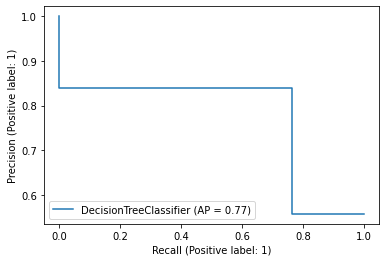

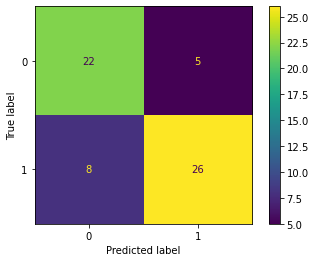

In [11]:
dt = DecisionTreeClassifier(random_state=0)
a,b,c,d, = model_fit_summarize(dt,X_train, y_train, X_test, y_test)
summary['DecisionTree'] = [a,b,c,d]

**Random Forest**

Accuracy score : 88.52 %
Precision score : 90.91 %
Recall score : 88.24 %
ROC_AUC score : 88.56 %

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



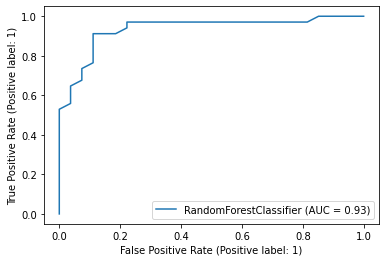

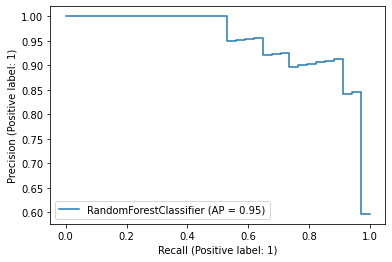

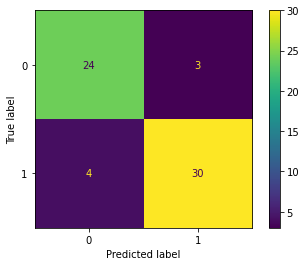

In [12]:
rf = RandomForestClassifier(random_state=101)
a,b,c,d = model_fit_summarize(rf,X_train, y_train, X_test, y_test)
summary['RandomForest']=[a,b,c,d]

**XGBoost**

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[21:22:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score : 81.97 %
Precision score : 82.86 %
Recall score : 85.29 %
ROC_AUC score : 81.54 %

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



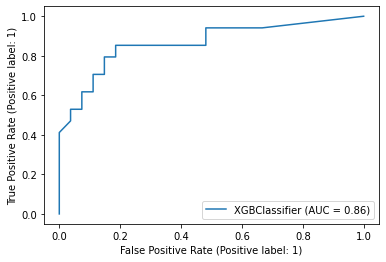

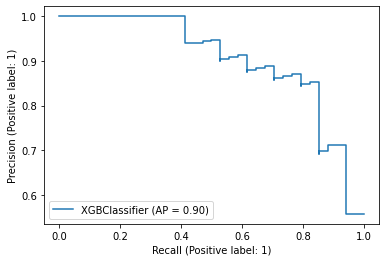

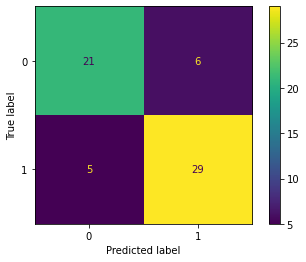

In [13]:
xg = XGBClassifier(random_state=123, n_estimators=25, learning_rate=0.01)
a,b,c,d = model_fit_summarize(xg,X_train, y_train, X_test, y_test)
summary['XGBoost'] = [a,b,c,d]

**Summary**

In [14]:
pd.set_option('precision',1)
print(summary)

           LogisticRegression  DecisionTree  RandomForest  XGBoost
Accuracy                 86.9          78.7          88.5     82.0
Precision                86.1          83.9          90.9     82.9
Recall                   91.2          76.5          88.2     85.3
ROC_AUC                  86.3          79.0          88.6     81.5
